In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl

In [281]:
import statsmodels.api as sm

In [282]:
start=pd.to_datetime('2015-01-01')
end=pd.to_datetime('2018-01-01')

In [283]:
df = quandl.get('WIKI/IBM.11',start_date=start,end_date=end,api_key='agKxm5nsz-Jfzg5Jsqc5')

In [284]:
df.head()

,Adj. Close
Date,
2015-01-02,145.530335
2015-01-05,143.240428
2015-01-06,140.151298
2015-01-07,139.235335
2015-01-08,142.261605


In [285]:
df.columns = ['Price']

In [286]:
df.index.to_datetime()

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=754, freq=None)

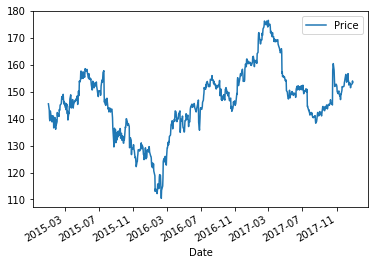

In [287]:
df.plot()

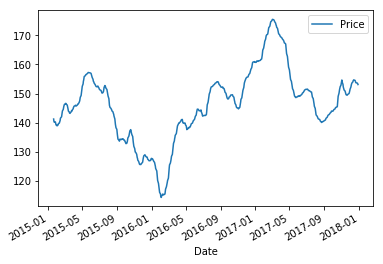

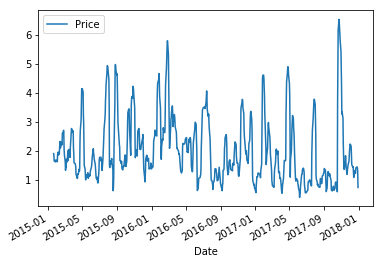

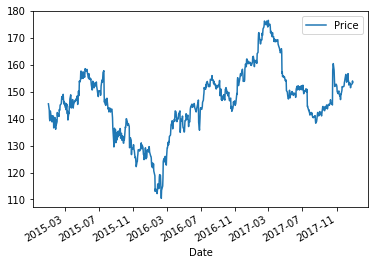

In [288]:
df.rolling(12).mean().plot(label='12 Month Rolling Mean')
df.rolling(12).std().plot(label='12 Month Rolling Std')
df.plot()
plt.legend()

,Milk in pounds
Month,
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0
1975-11-01,797.0
1975-12-01,843.0


,Price
count,1258.000000
mean,156.448636
std,15.300528
min,110.417390
25%,145.379566
50%,160.228491
75%,167.777436
max,186.405408


In [289]:
time_series = df['Price']

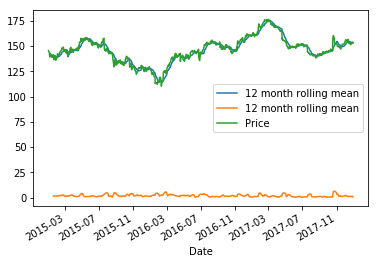

In [290]:
time_series.rolling(12).mean().plot(label='12 month rolling mean')
time_series.rolling(12).std().plot(label='12 month rolling mean')
time_series.plot()
plt.legend()

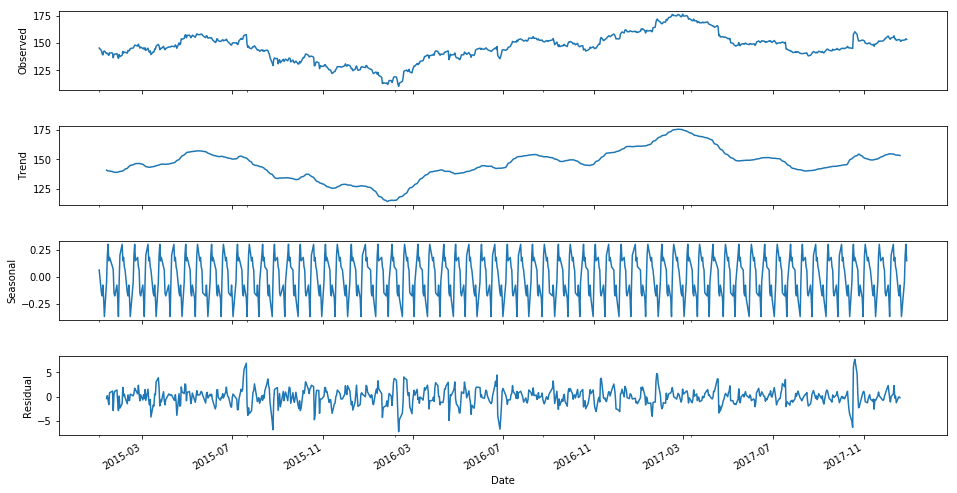

In [293]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Price'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [294]:
from statsmodels.tsa.stattools import adfuller

In [297]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [298]:
df['Price First Diff'] = df['Price'] - df['Price'].shift(1)

In [300]:
df['Price Second Diff'] = df['Price First Diff'] - df['Price First Diff'].shift(1)

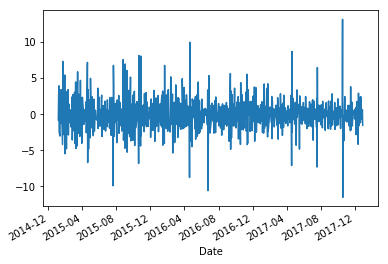

In [301]:
df['Price Second Diff'].plot()

In [303]:
adf_check(df['Price Second Diff'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -10.971013171259015
p-value : 7.880484279528752e-20
#Lags Used : 19
Number of Observations Used : 732
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


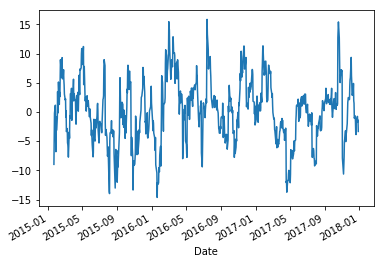

In [304]:
df['Seasonal Difference'] = df['Price'] - df['Price'].shift(12)
df['Seasonal Difference'].plot()

In [307]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.892868777202578
p-value : 3.600631613966401e-05
#Lags Used : 20
Number of Observations Used : 721
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [306]:
df

,Price,Price First Diff,Price Second Diff,Seasonal Difference
Date,,,,
2015-01-02,145.530335,NaN,NaN,NaN
2015-01-05,143.240428,-2.289907,NaN,NaN
2015-01-06,140.151298,-3.089130,-0.799222,NaN
2015-01-07,139.235335,-0.915963,2.173167,NaN
2015-01-08,142.261605,3.026269,3.942232,NaN
2015-01-09,142.881227,0.619622,-2.406648,NaN
2015-01-12,140.483559,-2.397667,-3.017289,NaN
2015-01-13,140.815820,0.332261,2.729929,NaN
2015-01-14,139.908838,-0.906983,-1.239244,NaN


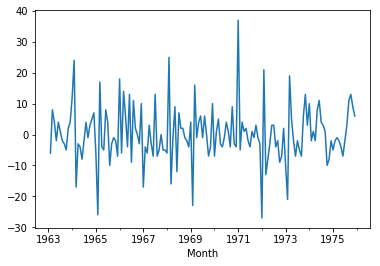

In [120]:
adf_check(df['First Diff'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic:-3.0549955586530646
p-value:0.03006800400178615
# of lags :14
Num of observations:152
strong evidance against null hypothesis
Data has no unit root and is stationary


In [311]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

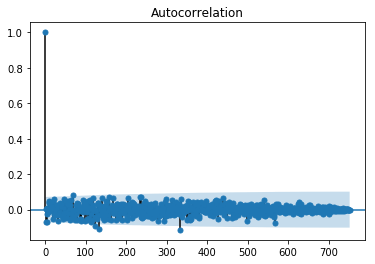

In [312]:
fig_first = plot_acf(df['Price First Diff'].dropna())

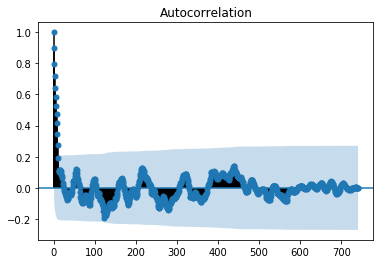

In [313]:
fig_seasonal_fig = plot_acf(df['Seasonal Difference'].dropna())

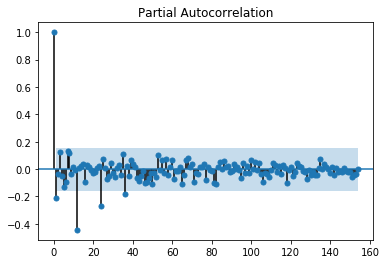

In [133]:
fig_seasonal_fig = plot_pacf(df['seasonal first Diff'].dropna())

In [314]:
from statsmodels.tsa.arima_model import ARIMA

In [138]:
model=sm.tsa.statespace.SARIMAX(df['Price'],order=(0,1,0),seasonal_order=(1,1,1,12))

In [139]:
results=model.fit()

In [140]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                     Milk in pounds   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Thu, 26 Jul 2018   AIC                           1074.131
Time:                                    21:07:30   BIC                           1083.503
Sample:                                01-01-1962   HQIC                          1077.934
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

In [141]:
results.resid

Month
1962-01-01    589.000000
1962-02-01    -28.000000
1962-03-01     79.000000
1962-04-01     16.000000
1962-05-01     71.000000
1962-06-01    -30.000000
1962-07-01    -57.000000
1962-08-01    -41.000000
1962-09-01    -31.000000
1962-10-01      9.000000
1962-11-01    -24.000000
1962-12-01     29.000000
1963-01-01   -276.500828
1963-02-01     -6.001008
1963-03-01      8.002845
1963-04-01      4.000576
1963-05-01     -1.997443
1963-06-01      3.998920
1963-07-01      0.997947
1963-08-01     -2.001476
1963-09-01     -3.001116
1963-10-01     -4.999676
1963-11-01      1.999136
1963-12-01      4.001044
1964-01-01     11.980057
1964-02-01     21.216675
1964-03-01    -13.288272
1964-04-01     -1.144490
1964-05-01     -4.926563
1964-06-01     -6.145184
                 ...    
1973-07-01      0.055591
1973-08-01     -6.173488
1973-09-01     -9.576142
1973-10-01      2.410388
1973-11-01      6.632801
1973-12-01      3.259519
1974-01-01      0.696325
1974-02-01     -9.375287
1974-03-01     10.3

In [142]:
df.tail()

,Milk in pounds,First Diff,Second Diff,seasonal Diff,seasonal first Diff
Month,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0
1975-09-01,817.0,-41.0,-3.0,2.0,11.0
1975-10-01,827.0,10.0,51.0,15.0,13.0
1975-11-01,797.0,-30.0,-40.0,24.0,9.0
1975-12-01,843.0,46.0,76.0,30.0,6.0


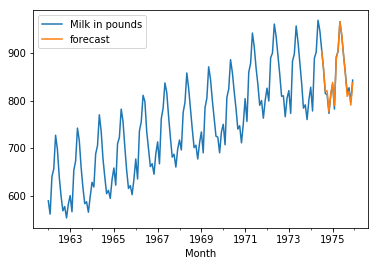

In [153]:
df['forecast']=results.predict(start=150,end=168)
df[['Milk in pounds','forecast']].plot()

In [143]:
from pandas.tseries.offsets import DateOffset

In [145]:
future_dates=[df.index[-1] +  DateOffset(months=x) for x in range(1,24)]

In [146]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [155]:
future_df= pd.DataFrame(index=future_dates,columns=df.columns)

In [156]:
final_df = pd.concat([df,future_df])

In [157]:
final_df['forecast']= results.predict(start=168,end=192)

In [158]:
final_df.tail()

,Milk in pounds,First Diff,Second Diff,seasonal Diff,seasonal first Diff,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.525751
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918840
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881041
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027162
1977-11-01,NaN,NaN,NaN,NaN,NaN,836.962873


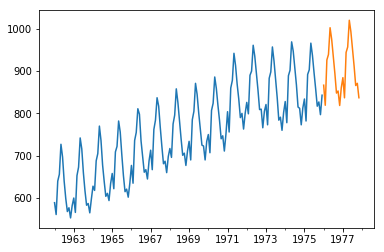

In [161]:
final_df['Milk in pounds'].plot()
final_df['forecast'].plot()

